In [1]:
""" Neural Network.
A 2-Hidden Layers Fully Connected Neural Network (a.k.a Multilayer Perceptron)
implementation with TensorFlow. This example is using the MNIST database
of handwritten digits (http://yann.lecun.com/exdb/mnist/).
Links:
    [MNIST Dataset](http://yann.lecun.com/exdb/mnist/).
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""

from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/", one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as plt

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [3]:
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [5]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Save model weights to disk
    save_path = saver.save(sess, "model_old")
    print("Model saved in file: %s" % save_path)
    
    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Step 1, Minibatch Loss= 14136.1846, Training Accuracy= 0.336
Step 100, Minibatch Loss= 404.8142, Training Accuracy= 0.828
Step 200, Minibatch Loss= 177.0466, Training Accuracy= 0.836
Step 300, Minibatch Loss= 71.5951, Training Accuracy= 0.883
Step 400, Minibatch Loss= 81.1849, Training Accuracy= 0.812
Step 500, Minibatch Loss= 77.5220, Training Accuracy= 0.836
Optimization Finished!
Model saved in file: model_old
Testing Accuracy: 0.8491


In [6]:
with tf.Session() as sess:
  
    # Run the initializer
    sess.run(init)
 
    saver.restore(sess, "model_old")
    print("Model restored from file: %s" % save_path)
     
    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model_old
Model restored from file: model_old
Testing Accuracy: 0.8491


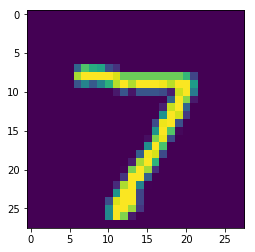

INFO:tensorflow:Restoring parameters from model_old
Model restored from file: model_old
Answer: [7]


In [9]:
# Evaluate model
# argmax returns the index with the largest value across axes of a tensor
ans = tf.argmax(prediction, 1)

# Show image that we want to predict
plt.imshow(mnist.test.images[0].reshape((28, 28)))
plt.show()

# Running a test dataset by loading the model saved earlier
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
 
    saver.restore(sess, "model_old")
    print("Model restored from file: %s" % save_path)
 
    # Calculate the answer for the image
    print("Answer:", sess.run(ans, feed_dict={X: mnist.test.images[0:1]}))